<a href="https://colab.research.google.com/github/MrMazagngy/EDA_Of_The_Brazilian_E_Commerce_Dataset/blob/main/Dev_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, auc



In [ ]:
data=pd.read_csv("/content/drive/MyDrive/new/train.csv")

**1. Data Cleaning**
i. Get rid of the non-numeric variables
ii. Plot the missingo plot to understand which columns contain NaN
iii. Initialize Sex variable values into 1 and 0 (m,f)
iv. Fill in the nan values in Age with the mean
v. Assign Embarked variable's values to 0, 1, 2 respectively (S, C, Q)

In [ ]:
dropped_columns= ["PassengerId", 'Name', 'Ticket', 'Cabin']
train_set= data.drop(dropped_columns, axis=1)
test_with_pas=test[["PassengerId"]]

test_drop=test.drop(dropped_columns, axis=1)


In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


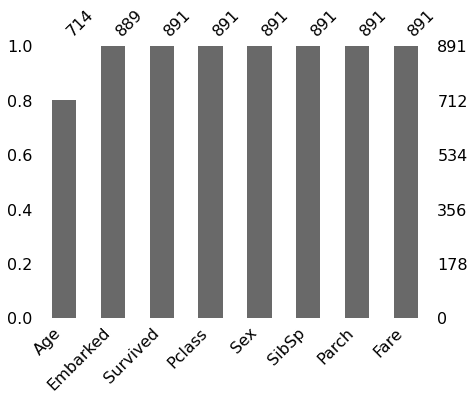

In [ ]:
p= missingno.bar(train_set, sort="ascending", figsize=(7,5))

In [ ]:
train_set['Sex'][train_set['Sex']== 'male']=0
train_set['Sex'][train_set['Sex']== 'female']=1
train_set['Embarked']= train_set['Embarked'].map({'S':0, 'C':1, 'Q':2})
train_set['Age'].fillna(train_set['Age'].mean(),inplace=True)
train_set.dropna(inplace=True, axis=0)

test_drop['Sex'][test_drop['Sex']== 'male']=0
test_drop['Sex'][test_drop['Sex']== 'female']=1
test_drop['Embarked']= test_drop['Embarked'].map({'S':0, 'C':1, 'Q':2})
test_drop['Age'].fillna(test_drop['Age'].mean(),inplace=True)
test_drop.dropna(inplace=True, axis=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_

In [ ]:
train_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,1,38.000000,1,0,71.2833,1.0
2,1,3,1,26.000000,0,0,7.9250,0.0
3,1,1,1,35.000000,1,0,53.1000,0.0
4,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0.0
887,1,1,1,19.000000,0,0,30.0000,0.0
888,0,3,1,29.699118,1,2,23.4500,0.0
889,1,1,0,26.000000,0,0,30.0000,1.0


**2. Splitting data into train and eval sets**

In [ ]:
train_data, eval_data= train_test_split(train_set, test_size=0.25, random_state=9)

In [ ]:
train_set.shape

(889, 8)

In [ ]:
train_data.shape

(666, 8)

In [ ]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
751,1,3,0,6.0,0,1,12.475,0.0
845,0,3,0,42.0,0,0,7.550,0.0


**`3. Data Normalization`**

---



In [ ]:
X_train= pd.DataFrame(data=train_data, columns=train_data.columns[1:])
Y_train= pd.DataFrame(data=train_data, columns=[train_data.columns[0]])

X_eval= pd.DataFrame(data=eval_data, columns=eval_data.columns[1:])
Y_eval= pd.DataFrame(data=eval_data, columns=[eval_data.columns[0]])


In [ ]:
#Standardization

scaler= StandardScaler()
scaler= scaler.fit(X_train)

X_train_s=scaler.transform(X_train)
X_eval_s= scaler.transform(X_eval)

Y_train_s= np.array(Y_train).flatten()
Y_eval_s= np.array(Y_eval).flatten()


Decision Tree

In [ ]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#fitting decision tree model on trainset
decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree.fit(X_train_s,Y_train_s)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
#checking the training set
decision_tree.score(X_train_s,Y_train_s)

0.9834834834834835

In [ ]:
#predicting values on train_set
y_predict = decision_tree.predict(X_eval_s)


In [ ]:
#checking accuracy of train set
acc_decision_tree = round(decision_tree.score(X_train_s, Y_train_s) * 100, 2)
acc_decision_tree

98.35

In [ ]:
#checking accuracy of evaluation set
acc_decision_tree1 = round(decision_tree.score(X_eval_s, Y_eval_s) * 100, 2)
acc_decision_tree1

74.44

In [ ]:
#changing the max depth
train_accuracy_max_depth= []
validation_accuracy_max_depth= []
for depth in range(1,10):
  decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=10)
  decision_tree.fit(X_train_s,Y_train_s)
  train_accuracy_max_depth.append(decision_tree.score(X_train_s,Y_train_s))
  validation_accuracy_max_depth.append(decision_tree.score(X_eval_s,Y_eval_s))

In [ ]:
frame = pd.DataFrame({"max_depth" : range(1,10), "training accuracy":train_accuracy_max_depth, "evaluation accuracy":validation_accuracy_max_depth})
frame.head()

,max_depth,training accuracy,evaluation accuracy
0,1,0.792793,0.766816
1,2,0.792793,0.766816
2,3,0.828829,0.816143
3,4,0.833333,0.811659
4,5,0.849850,0.816143


In [ ]:
max_max_depth=20

In [ ]:
err_train, err_eval = [], []
for k in range(1, max_max_depth):

  decision_tree = DecisionTreeClassifier(max_depth=k, max_leaf_nodes=25, random_state=10)
  decision_tree.fit(X_train_s,Y_train_s)
  Y_train_pred = decision_tree.predict(X_train_s)
  Y_eval_pred = decision_tree.predict(X_eval_s)
  err_train.append(100*np.mean(Y_train_pred != Y_train_s))
  err_eval.append(100*np.mean(Y_eval_pred != Y_eval_s))


Min eval error is 15.7% for max_depth=6


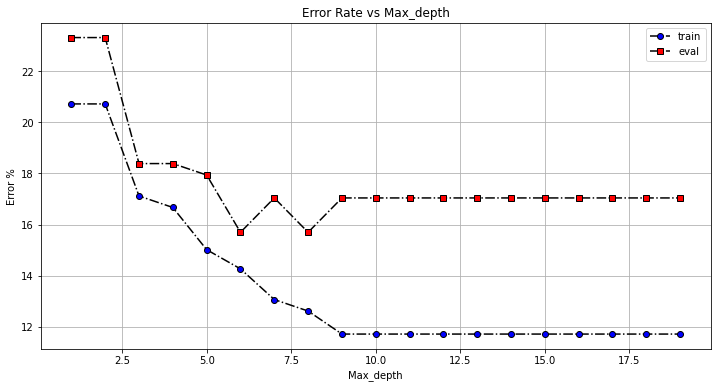

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(err_train)+1), err_train, color='black', linestyle='dashdot', marker='o',
         markerfacecolor='blue', markersize=6, label='train')
plt.plot(range(1, len(err_eval)+1), err_eval, color='black', linestyle='dashdot', marker='s',
         markerfacecolor='red', markersize=6, label='eval')
plt.grid()
plt.title('Error Rate vs Max_depth')
plt.xlabel('Max_depth')
plt.ylabel('Error %')
plt.legend()

print(f"Min eval error is {min(err_eval):.3g}% for max_depth={np.argmin(err_eval)+1}")

In [ ]:
max_max_leaf=100

In [ ]:
err_train, err_eval = [], []
for k in range(2, max_max_leaf):

  decision_tree = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=k, random_state=10)
  decision_tree.fit(X_train_s,Y_train_s)
  Y_train_pred = decision_tree.predict(X_train_s)
  Y_eval_pred = decision_tree.predict(X_eval_s)
  err_train.append(100*np.mean(Y_train_pred != Y_train_s))
  err_eval.append(100*np.mean(Y_eval_pred != Y_eval_s))

Min eval error is 14.8% for max_leaf=14


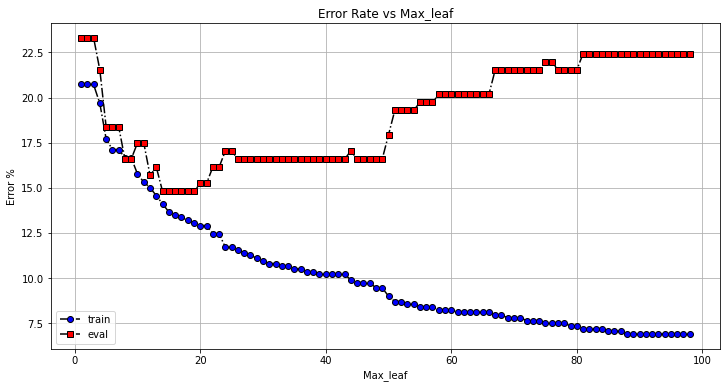

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(err_train)+1), err_train, color='black', linestyle='dashdot', marker='o',
         markerfacecolor='blue', markersize=6, label='train')
plt.plot(range(1, len(err_eval)+1), err_eval, color='black', linestyle='dashdot', marker='s',
         markerfacecolor='red', markersize=6, label='eval')
plt.grid()
plt.title('Error Rate vs Max_leaf')
plt.xlabel('Max_leaf')
plt.ylabel('Error %')
plt.legend()

print(f"Min eval error is {min(err_eval):.3g}% for max_leaf={np.argmin(err_eval)+1}")

In [ ]:
#checking accuracy of train set
acc_decision_tree1 = round(decision_tree.score(X_train_s, Y_train_s) * 100, 2)
acc_decision_tree1

93.09

In [ ]:
#checking accuracy of evaluation set
acc_decision_tree1 = round(decision_tree.score(X_eval_s, Y_eval_s) * 100, 2)
acc_decision_tree1

77.58

In [ ]:
path=decision_tree.cost_complexity_pruning_path(X_train_s,Y_train_s)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.00025025 0.00049118 0.0005005  0.0005005  0.0005148
 0.00057398 0.000728   0.00075075 0.00087588 0.000988   0.0009957
 0.001001   0.001001   0.00101005 0.00124245 0.00128276 0.001287
 0.00131381 0.00131541 0.00133589 0.001386   0.00140766 0.00142248
 0.00148389 0.00174368 0.0018018  0.002002   0.00225225 0.00225225
 0.0024024  0.0024841  0.00253825 0.00266934 0.00268126 0.0027027
 0.00289142 0.00320014 0.00371085 0.00376229 0.00391715 0.00463017
 0.00547449 0.00942119 0.01391763 0.03179888 0.14312916]
***********************************************************
Impurities in Decision Tree : [0.09903103 0.09928129 0.09977246 0.10027296 0.10077346 0.10128826
 0.10186225 0.10259025 0.103341   0.10509275 0.10805675 0.11104387
 0.11404687 0.11604887 0.11907903 0.1252913  0.12913959 0.1304266
 0.13305422 0.13700044 0.13833634 0.14110834 0.14392366 0.14676861
 0.15270417 0.15444785 0.15805145 0.16005346 0.16230571 0.16455796
 0.16696036 0.16944

In [ ]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train_s,Y_train_s)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))


Last node in Decision tree is 1 and ccp_alpha for last node is 0.14312915774903273


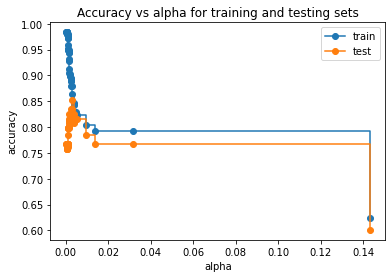

In [ ]:
train_scores = [clf.score(X_train_s,Y_train_s) for clf in clfs]
test_scores = [clf.score(X_eval_s,Y_eval_s) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

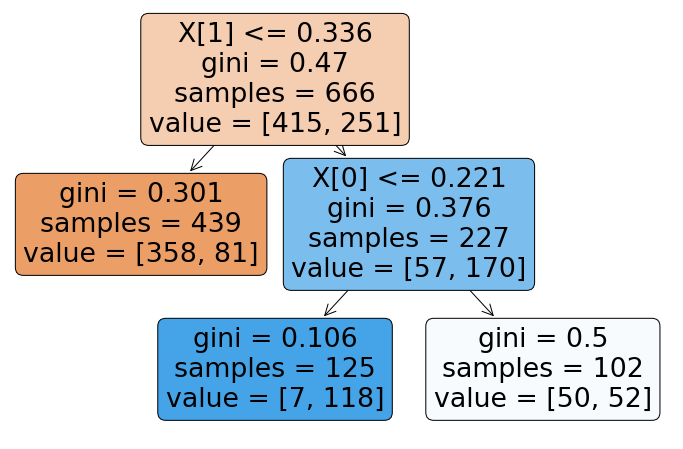

In [ ]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
clf.fit(X_train_s,Y_train_s)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [ ]:
accuracy_score(Y_train_s,clf.predict(X_train_s))


0.7927927927927928

Visualise of a tree

In [ ]:
#import libraries
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

features = list(train_set.columns)
features.remove("Survived")


In [ ]:
dot_data = StringIO()
from pydotplus import graph_from_dot_data

import pydotplus

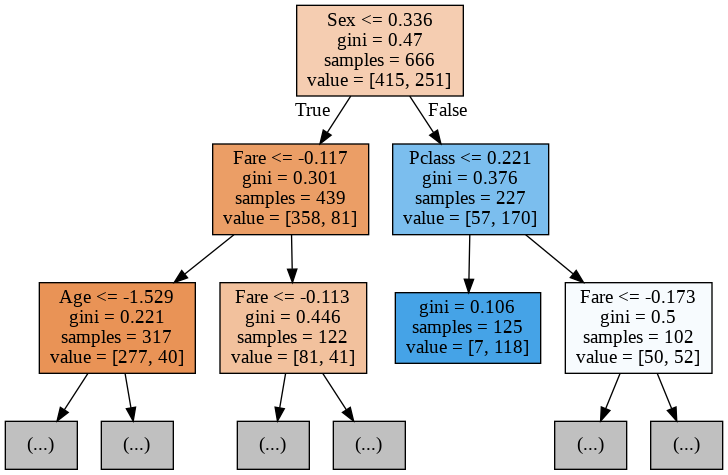

In [ ]:
export_graphviz(decision_tree, out_file=dot_data, feature_names=features, max_depth=2, filled=True)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
X_eval_s.shape

(223, 7)

In [ ]:
test.shape

(417, 8)

In [ ]:
surv_pred=decision_tree.predict(test_drop)

In [ ]:
surv_pred_df=pd.DataFrame(surv_pred)

In [ ]:
surv_pred_df

,0
0,0
1,1
2,0
3,0
4,0
...,...
412,0
413,1
414,0
415,0


In [ ]:
surv_pred.shape

(417,)

In [ ]:
test_with_pas.shape

(418, 1)

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/new/Archives/test.csv")

In [ ]:
test_with_pas

,PassengerId
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
413,NaN
414,NaN
415,NaN
416,NaN


In [ ]:
submit= test_with_pas

submit.iloc[:418, :]=surv_pred_df

submit.to_csv("/content/drive/MyDrive/new/results4.csv", index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Random Forest**

In [ ]:
max_n_estim=200

In [ ]:
from sklearn.ensemble import RandomForestClassifier
err_train, err_eval = [], []
for k in range(1, max_n_estim):
  random_forest = RandomForestClassifier(n_estimators=100)
  random_forest.fit(X_train_s,Y_train_s)

  Y_train_pred = decision_tree.predict(X_train_s)
  Y_eval_pred = decision_tree.predict(X_eval_s)

  err_train.append(100*np.mean(Y_train_pred != Y_train_s))
  err_eval.append(100*np.mean(Y_eval_pred != Y_eval_s))
  
  #Y_pred = random_forest.predict(X_eval_s)
  #random_forest.score(X_train_s, Y_train_s)
  #acc_random_forest = round(random_forest.score(X_train_s, Y_train_s) * 100, 2)
  #acc_random_forest


Min eval error is 22.4% for max_leaf=1


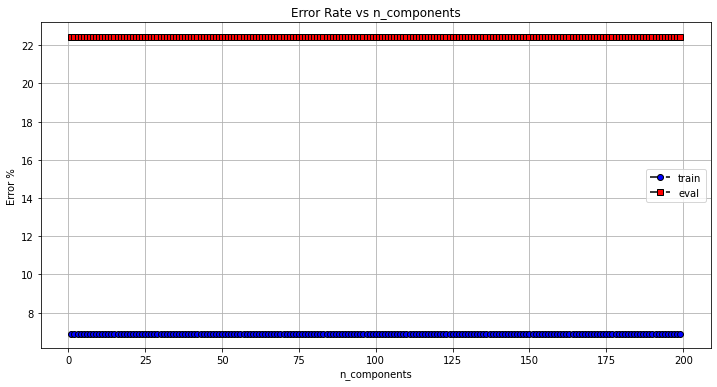

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(err_train)+1), err_train, color='black', linestyle='dashdot', marker='o',
         markerfacecolor='blue', markersize=6, label='train')
plt.plot(range(1, len(err_eval)+1), err_eval, color='black', linestyle='dashdot', marker='s',
         markerfacecolor='red', markersize=6, label='eval')
plt.grid()
plt.title('Error Rate vs n_components')
plt.xlabel('n_components')
plt.ylabel('Error %')
plt.legend()

print(f"Min eval error is {min(err_eval):.3g}% for max_leaf={np.argmin(err_eval)+1}")

In [ ]:
acc_random_forest1 = round(random_forest.score(X_eval_s, Y_eval_s) * 100, 2)
acc_random_forest1

77.58

In [ ]:
##print_score(random_forest, X_train_s, Y_train_s, X_eval_s, Y_eval_s, train_set=True)
##print_score(random_forest, X_train_s, Y_train_s, X_eval_s, Y_eval_s, train_set=False)

<BarContainer object of 7 artists>

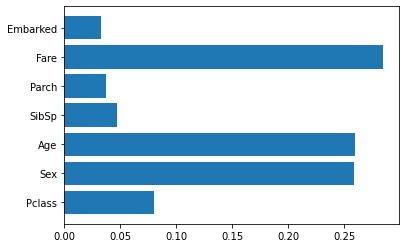

In [ ]:
#Get important feqtures from random_forest
plt.barh(X_train.columns.values, random_forest.feature_importances_)

In [ ]:
#Apply Naiive Bayes Model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_s, Y_train_s)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print('Accuracy of Naiive Bayes Model is :' , round(nb.score(X_eval_s,Y_eval_s),2))

In [ ]:
#split data again but with nly important features extracted by RF
X_train_features_imp= train_data.iloc[:,[2,3,6]]
Y_train_features_imp= pd.DataFrame(data=train_data, columns=[train_data.columns[0]])

X_eval_features_imp= eval_data.iloc[:,[2,3,6]]
Y_eval_features_imp= pd.DataFrame(data=eval_data, columns=[eval_data.columns[0]])


In [ ]:
#Apply Naiive Bayes Model with feature importance

nb_features_imp = GaussianNB()
nb_features_imp.fit(X_train_features_imp, Y_train_features_imp)

In [ ]:
print('Accuracy of Naiive Bayes Model with feature importance is :' , round(nb_features_imp.score(X_eval_features_imp,Y_eval_features_imp),2))